In [53]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

In [54]:
(mg,z) = read_esri_ascii("/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/k13_20210208_sfm.asc", name='topographic__elevation')
mg.at_node.keys()

['topographic__elevation']

In [55]:
mg.set_watershed_boundary_condition(z)

In [56]:
fa = FlowAccumulator(mg,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [57]:
(drainage_area, discharge) = fa.accumulate_flow()

In [58]:
S = mg.calc_slope_at_node(z)   # let's call this a slope field and add it to the grid
_=mg.add_field('node','Slope',S, clobber=True)  

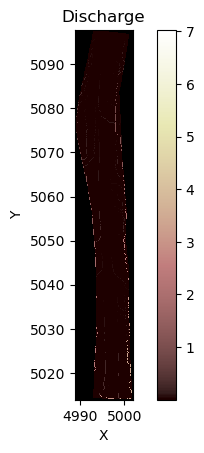

In [67]:
imshow_grid(mg,'surface_water__discharge', plot_name = 'Discharge')

In [66]:
mg.at_node.keys()

['topographic__elevation',
 'water__unit_flux_in',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'flow__sink_flag',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'depression__depth',
 'depression__outlet_node',
 'is_pit',
 'flood_status_code',
 'Slope',
 'channel_network']

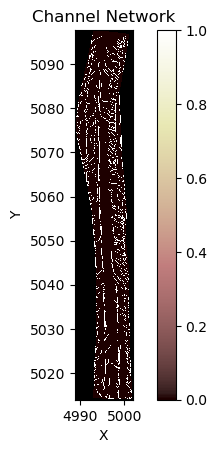

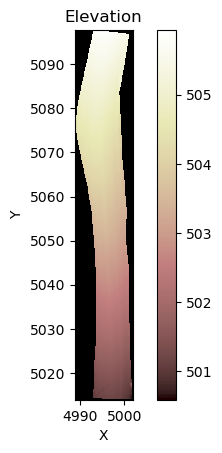

In [62]:
imshow_grid(mg,'topographic__elevation',plot_name='Elevation')